# 🏨 Hotel Booking Demand Analysis

This notebook analyzes hotel booking data to uncover insights regarding customer behavior, booking patterns, and potential business strategies. The dataset used is `Hotelbooking.csv`.

## 🎯 Project Objectives  
- **Exploratory Analysis:** Understand temporal trends, market segments, and guest demographics.    
- **Cancellation Drivers:** Quantify how lead-time, seasonality, deposit type, etc., influence cancellations.    
- **Predictive Modelling:** Benchmark algorithms (LogReg, Random Forest, XGBoost) to classify cancellations.    
- **Business Recommendations:** Translate insights into strategies for pricing, overbooking, and marketing.  

## 📚 Table of Contents
1. [Introduction](#introduction)
2. [Problem Statement](#problem-statement)
3. [Dataset Description](#dataset-description)
4. [Data Preprocessing](#data-preprocessing)
5. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
6. [Feature Engineering](#feature-engineering)
7. [Model Building](#model-building)
8. [Model Evaluation](#model-evaluation)
9. [Conclusion](#conclusion)
10. [References](#references)

## 🔍 Introduction

Hotel management faces challenges due to last-minute cancellations and overbookings. Predictive analytics can help anticipate customer behavior and reduce cancellation risks. This notebook analyzes hotel booking data to uncover insights and predict cancellations.

## ❗ Problem Statement

Predict whether a hotel booking will be canceled or not based on customer and reservation-related features using machine learning techniques.


In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("Hotelbooking.csv")
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,03-07-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,03-07-2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,06-05-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22-04-2015


In [4]:
#To check the size of dataset
df.shape

(119390, 32)

In [5]:
# Evaluating the datatypes and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#Evaluating column wise Null values count
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## 📁 Dataset Description

The dataset contains **119,390** hotel booking records and **32 columns**. Key variables include:

- `hotel`: Type of hotel (City or Resort)
- `is_canceled`: Target variable (1 = Canceled, 0 = Not Canceled)
- `lead_time`: Number of days between booking and arrival
- `arrival_date_year`, `arrival_date_month`, etc.
- `stays_in_weekend_nights`, `stays_in_week_nights`
- `adults`, `children`, `babies`
- `meal`, `country`, `market_segment`, `distribution_channel`
- `deposit_type`, `customer_type`, `adr` (average daily rate)
- `reservation_status`, `reservation_status_date`

Missing data exists in `children`, `country`, `agent`, and `company`.

## 🧹 Data Preprocessing

Steps involved:
- Handling missing values (`children`, `agent`, `company`, etc.)
- Dropping uninformative columns (if any)
- Encoding categorical features
- Converting date strings to datetime objects
- Creating new features like total_stay = `stays_in_weekend_nights` + `stays_in_week_nights`

In [7]:
# Drop columns with too many missing values
df.drop(['company'], axis=1, inplace=True)

In [8]:
# Fill missing numeric columns with median
df['children'].fillna(df['children'].median(), inplace=True)
df['agent'].fillna(df['agent'].median(), inplace=True)

In [10]:
# Fill missing categorical values with mode
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [12]:
# Convert date column to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d-%m-%Y', dayfirst=True)

## 📊 Exploratory Data Analysis (EDA)

- **Cancellation rate**: ~37% of bookings were canceled.
- **Booking lead time**: Canceled bookings had significantly higher lead time.
- **Hotel Type**: City hotels had more cancellations than resort hotels.
- **ADR**: Higher average daily rate is associated with cancellations.
- **Customer Type**: Transient customers formed the majority.
- **Seasonality**: Demand peaks observed in August.

Visualizations include:
- Bar plots
- Histograms
- Heatmaps
- Boxplots by cancellation status


## 📅 Monthly Booking Counts

This visualization displays the total number of hotel bookings made each month, based on the `reservation_status_date`.

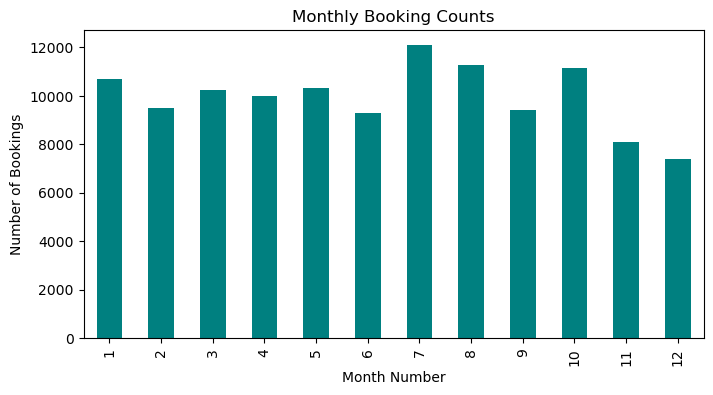

In [30]:
plt.figure(figsize=(8,4))
df['reservation_status_date'].dt.month.value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Monthly Booking Counts')
plt.xlabel('Month Number')
plt.ylabel('Number of Bookings')
plt.show()

### 📝 Interpretation:
The bar chart reveals distinct seasonal trends in hotel booking volumes:

- July, October, and January show peak booking activity.

- These spikes may correspond to summer vacations, festive seasons (such as Durga Puja and Diwali in October), and New Year travel plans.

- Understanding these peak periods can help hotels with inventory planning, pricing strategies, and staff allocation.

## ❌ Monthly Cancellation Rate

This bar plot shows the **average cancellation rate** for bookings by **arrival month**. It helps identify seasonal patterns in booking behavior and highlights months when cancellations are more frequent.


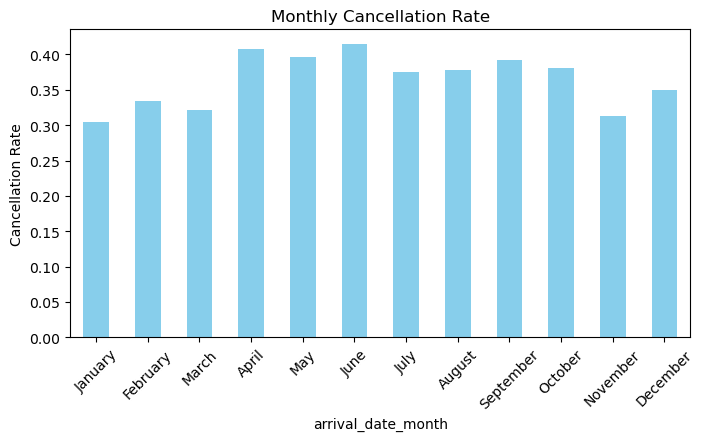

In [13]:
#  Monthly Cancellations
plt.figure(figsize=(8,4))
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
monthly_cancellations = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(month_order)
monthly_cancellations.plot(kind='bar', color='skyblue')
plt.title('Monthly Cancellation Rate')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

### 📝 Interpretation:
The chart reveals key months with a higher likelihood of cancellations:

-  April, June, September, and October exhibit the highest cancellation rates.

-  These peaks could be linked to uncertain travel plans during off-peak seasons or last-minute changes due to academic schedules, monsoon-related disruptions, or changes in holiday plans.

- Identifying such trends can help hotels implement flexible pricing, non-refundable policies, or targeted communication to reduce cancellations during these months.

## 🌍 Top 10 Booking Countries

This bar chart displays the **top 10 countries** by number of hotel bookings. The data helps identify the most active customer origins and can be useful for tailoring marketing and customer service strategies.


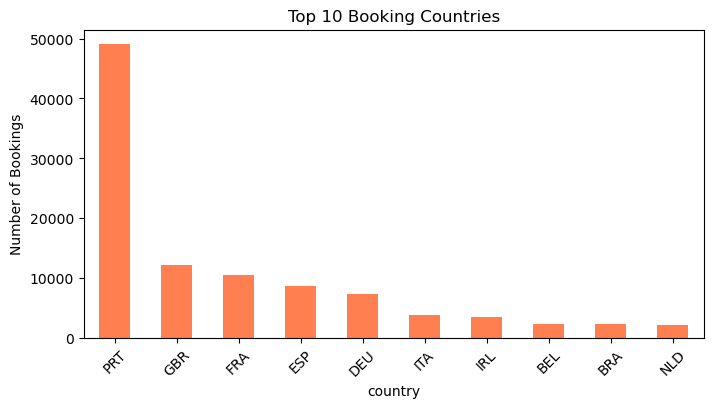

In [14]:
#  Country-wise booking distribution (top 10)
plt.figure(figsize=(8,4))
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Booking Countries')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()

### 📝 Interpretation:

The chart highlights the **top 10 countries** with the most hotel bookings. The booking volume from each country, in descending order, is:

- **PRT** (Portugal)  
- **GBR** (United Kingdom)  
- **FRA** (France)  
- **ESP** (Spain)  
- **DEU** (Germany)  
- Others follow with smaller booking volumes.

This insight can help hoteliers:

- Focus **marketing campaigns** on high-volume countries.  
- Enhance **language-specific communication** and **customer service**.  
- Customize **packages or offers** for regions showing consistently high engagement.


## 🛎️ Do Special Requests Affect Cancellations?

This box plot compares the number of special requests between canceled and non-canceled bookings.


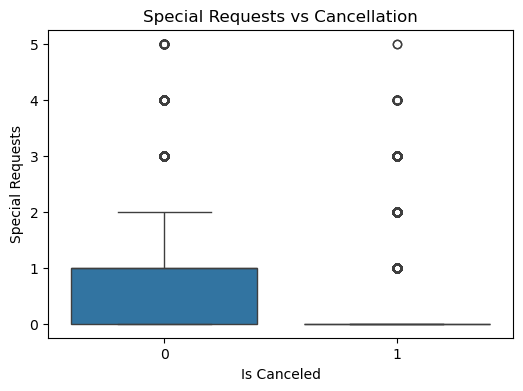

In [15]:
# Special requests vs cancellation
plt.figure(figsize=(6,4))
sns.boxplot(x='is_canceled', y='total_of_special_requests', data=df)
plt.title('Special Requests vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Special Requests')
plt.show()

**Interpretation**:  
If customers with more requests tend to cancel less, it may indicate a higher commitment level. Conversely, a similar distribution suggests requests don't significantly impact cancellation behavior.

## 💤 Guest Stay Duration Distribution

This histogram shows the frequency distribution of total stay durations, calculated by summing weekday and weekend nights.

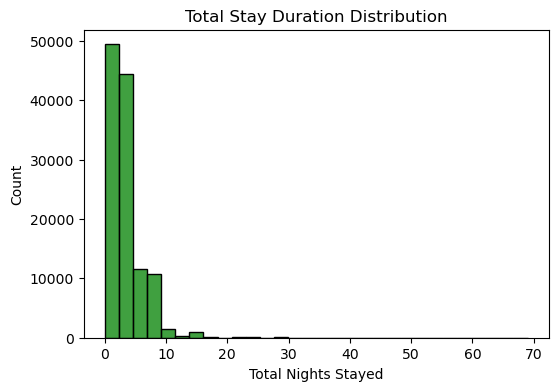

In [17]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#  Total stay duration
plt.figure(figsize=(6,4))
sns.histplot(df['total_stay'], bins=30, color='green')
plt.title('Total Stay Duration Distribution')
plt.xlabel('Total Nights Stayed')
plt.show()

**Interpretation**:  
Most guests appear to stay for 1 to 3 nights, suggesting that the hotel mainly attracts short-term visitors—likely business travelers, weekend tourists, or stopovers. Fewer long-term stays might indicate opportunities for offering long-stay packages or loyalty discounts. This information supports decisions in room pricing, cleaning schedules, and service offerings tailored to the length of stay.

## ❗ Overall Booking Cancellation Count

This count plot shows the number of bookings that were canceled (`1`) versus those that were successfully completed (`0`).

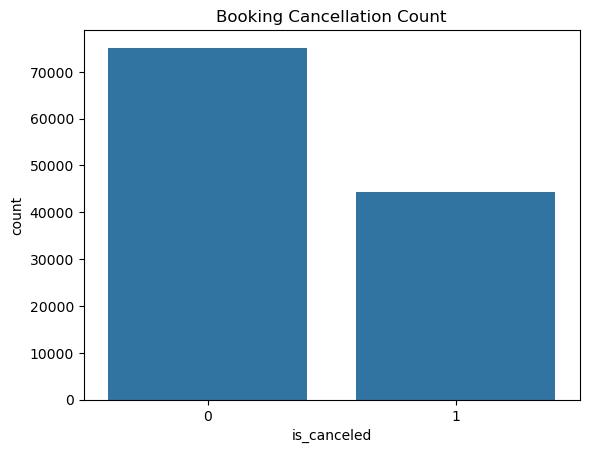

In [18]:
#  Booking status count
sns.countplot(x='is_canceled', data=df)
plt.title('Booking Cancellation Count')
plt.show()

**Interpretation**:  
If a significant portion of bookings are canceled, it may suggest issues such as overbooking, strict policies, or non-committed customers. A high cancellation rate can directly impact revenue and operational efficiency. It’s important for the hotel to identify why such cancellations occur and possibly implement policies (e.g., partial prepayment, free cancellation windows) to mitigate them.

## 🏨 Hotel Type vs. Booking Cancellation

This plot compares the number of cancellations between different hotel types (e.g., City Hotel vs. Resort Hotel).


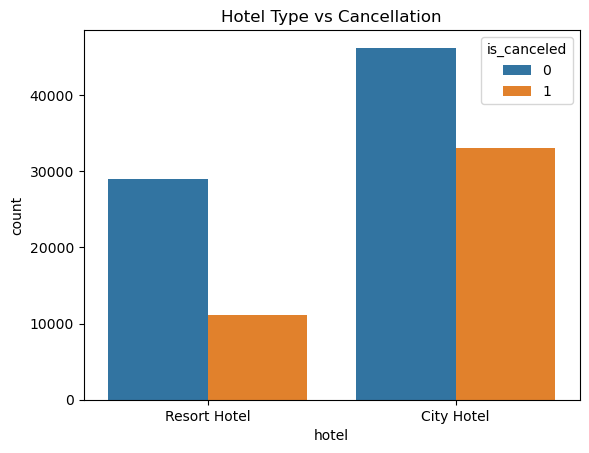

In [19]:
#  Hotel type vs cancellation
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Hotel Type vs Cancellation')
plt.show()

**Interpretation**:  
If city hotels have a higher cancellation count, it might reflect more business bookings that are prone to change. Resort hotels may show fewer cancellations due to planned leisure stays. These patterns help in tailoring different cancellation policies and marketing strategies for different hotel types based on their usage and clientele.

## ⏳ Lead Time Distribution

This histogram shows how many days in advance guests typically book their stay (lead time).

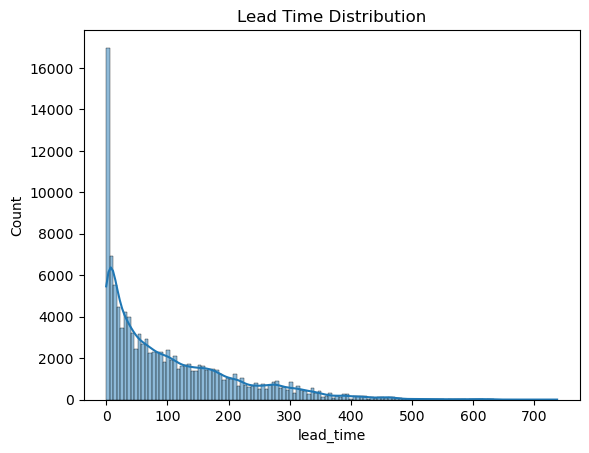

In [20]:
#  Lead time distribution
sns.histplot(df['lead_time'], kde=True)
plt.title('Lead Time Distribution')
plt.show()

**Interpretation**:  
Long lead times may be typical for vacations or events planned in advance, while shorter ones may indicate spontaneous or business trips. A right-skewed distribution indicates many people book early. Analyzing this helps optimize pricing strategies—higher prices for longer lead times (early birds) or discounts for last-minute bookings.

## 💵 ADR Distribution Based on Cancellation Status

This box plot compares the Average Daily Rate (ADR) of canceled bookings versus non-canceled ones.

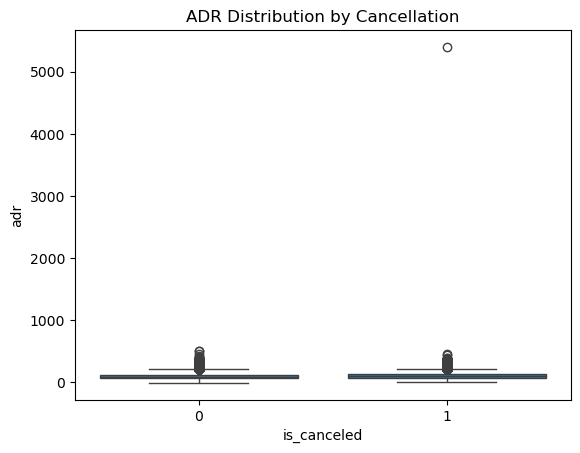

In [21]:
#  ADR vs cancellation
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('ADR Distribution by Cancellation')
plt.show()

**Interpretation**:  
If canceled bookings tend to have higher ADRs, guests may be more price-sensitive and cancel if better options arise. Lower ADR cancellations may indicate deals or promotions not translating into confirmed stays. This insight aids in refining pricing strategies to balance affordability and commitment.

## 👥 Customer Type vs. Cancellation Rate

This bar chart shows the average cancellation rate across different customer segments (e.g., Transient, Contract, Group, Transient-Party).


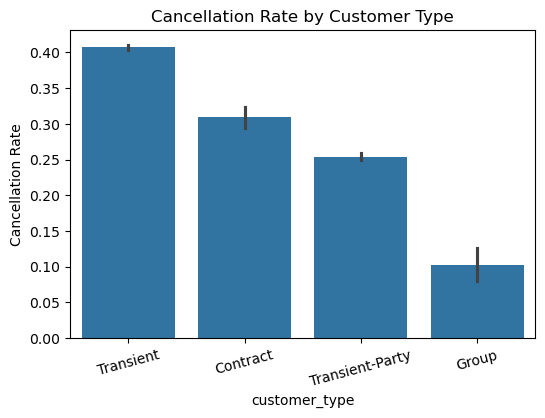

In [23]:
plt.figure(figsize=(6,4))
sns.barplot(x='customer_type', y='is_canceled', data=df)
plt.title('Cancellation Rate by Customer Type')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=15)
plt.show()

**Interpretation**:  
Transient guests (individual short stays) may show higher cancellation rates, while group or contractual bookings typically show lower rates due to prior commitments. Knowing which segments are more reliable helps in prioritizing them in promotional offers or crafting more flexible policies for high-risk segments.

## 📊 1. Length of Stay vs Cancellation

This boxplot visualizes the relationship between the **total number of nights stayed** and whether the booking was **canceled**. It helps assess whether the duration of stay has any influence on cancellation behavior.


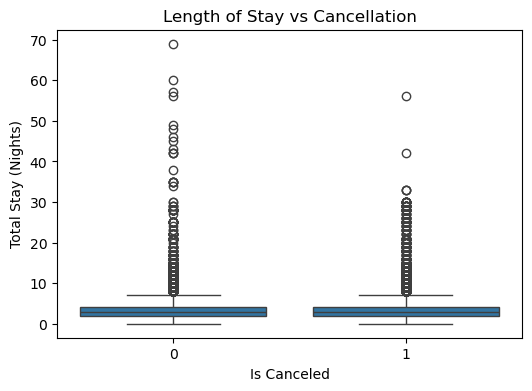

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_canceled', y='total_stay', data=df)
plt.title('Length of Stay vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Total Stay (Nights)')
plt.show()

### 📝 Interpretation:
- Most bookings, whether canceled (`1`) or not (`0`), are for short stays (under 10 nights).
- The median stay length is almost the same in both cases.
- A few bookings with **long stays** are more prominent in the **non-canceled** category.
- Overall, **length of stay doesn’t significantly impact cancellation**, though longer stays might indicate more serious travelers.

## 🤝  Special Requests by Customer Type
This boxplot shows how the number of **special service requests** varies across different **customer types** like Transient, Contract, Group, etc.


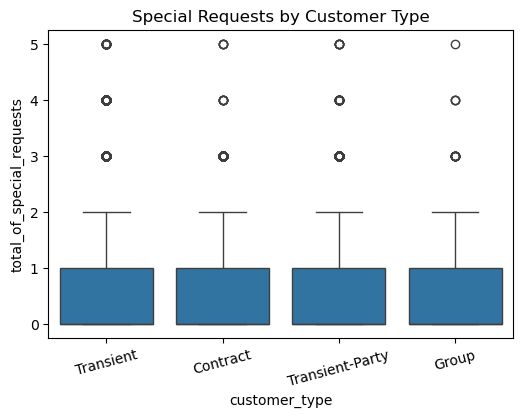

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x='customer_type', y='total_of_special_requests', data=df)
plt.title('Special Requests by Customer Type')
plt.xticks(rotation=15)
plt.show()

### 📝 Interpretation:
- Most customer types request **0 to 2 services**.
- There are **outliers with 4–5 requests**, especially in the **Transient** group.
- **Group customers** tend to request **fewer services** compared to individual travelers.
- Understanding request patterns helps in **resource planning and customer profiling**.

## 📈  Market Segment Distribution

This bar chart shows the number of bookings received from each **market segment** like Online TA, Groups, Direct, etc.

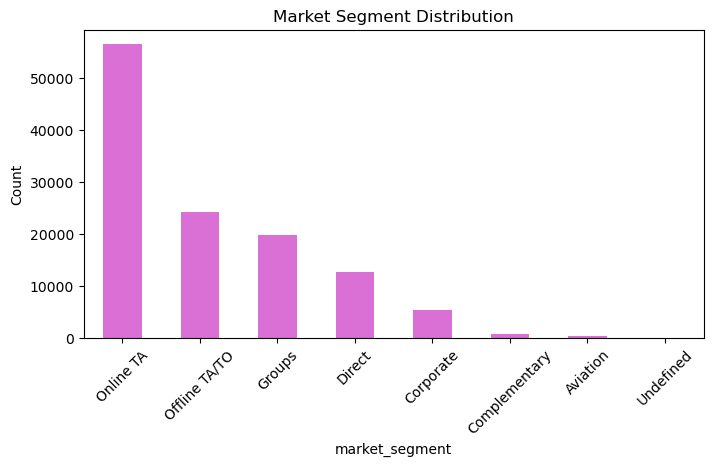

In [33]:
plt.figure(figsize=(8,4))
df['market_segment'].value_counts().plot(kind='bar', color='orchid')
plt.title('Market Segment Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 📝 Interpretation:
- **Online TA (Travel Agents)** is the most dominant segment, followed by **Offline TA/TO** and **Groups**.
- Segments like **Corporate**, **Aviation**, and **Complementary** contribute minimally.
- Helps the business identify where the **majority of customers originate from**, aiding in **targeted marketing** and **strategic partnerships**.


## 🚗 4. Parking Spaces vs Cancellation

This boxplot explores the relationship between **required car parking spaces** and booking cancellation.

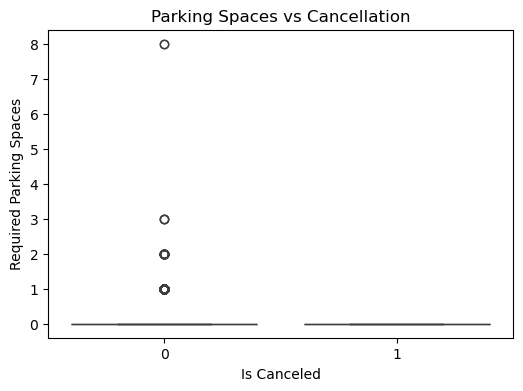

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='is_canceled', y='required_car_parking_spaces', data=df)
plt.title('Parking Spaces vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Required Parking Spaces')
plt.show()

### 📝 Interpretation:
- The majority of bookings **do not require parking** (value = 0).
- Guests who **do request parking spaces** are **less likely to cancel**, indicating they may have **stronger travel plans** or are **more committed**.
- Parking requirement can act as a **weak predictor of booking reliability**.

## 🏨 Room Change vs Cancellation

This countplot visualizes the impact of **room changes** on cancellation rates. A room change occurs when the **assigned room type differs from the reserved room type**.

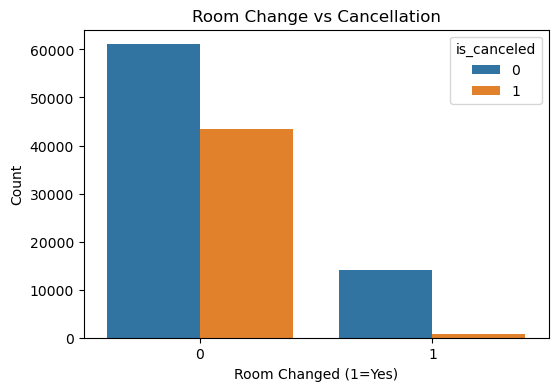

In [35]:
plt.figure(figsize=(6,4))
df['room_changed'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
sns.countplot(x='room_changed', hue='is_canceled', data=df)
plt.title('Room Change vs Cancellation')
plt.xlabel('Room Changed (1=Yes)')
plt.ylabel('Count')
plt.show()


### 📝 Interpretation:
- When there is **no room change**, cancellation is significantly higher.
- When a room change occurs, **cancellations decrease dramatically**, possibly because only confirmed guests proceed to room reassignment.
- This metric might also capture **overbooking or inventory management issues** that impact guest satisfaction.

## 🕵️‍♂️ 6. Agent-wise Booking Cancellations

This histogram shows the number of bookings and cancellations handled by various **agent IDs**.


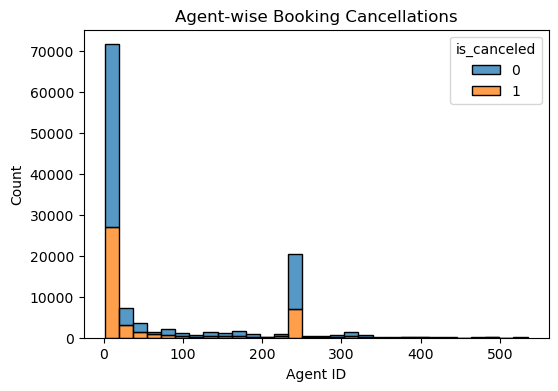

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='agent', hue='is_canceled', bins=30, kde=False, multiple='stack')
plt.title('Agent-wise Booking Cancellations')
plt.xlabel('Agent ID')
plt.ylabel('Count')
plt.show()

### 📝 Interpretation:
- Some agents (like **Agent 9**) handle **a large number of bookings**, with both high confirmation and cancellation rates.
- Other agents show skewed patterns — some consistently generate more **confirmed** bookings, others more **canceled** ones.
- This helps identify **low-performing agents**, and allows for **performance evaluation** or **contract renegotiation**.

## ⚙️ Feature Engineering

To prepare the data for machine learning models, the following feature engineering steps were performed:

1. **Label Encoding**  
   All categorical features were label-encoded using `LabelEncoder`. This converts string labels into integer values, making them suitable for scikit-learn models. The following object-type columns were encoded:
   - hotel
   - arrival_date_month
   - meal
   - country
   - market_segment
   - distribution_channel
   - reserved_room_type
   - assigned_room_type
   - deposit_type
   - customer_type
   - reservation_status (removed later)
   - reservation_status_date (removed later)

2. **Feature and Target Separation**  
   The target variable `is_canceled` was separated from the features. Additionally, the columns `reservation_status` and `reservation_status_date` were dropped to prevent data leakage, as they are determined after cancellation happens.

3. **Train-Test Split**  
   The dataset was split into training and testing sets using an 80:20 ratio with a random seed of 42 to ensure reproducibility.

4. **Feature Scaling**  
   Standardization was applied using `StandardScaler`. This scales all features to have zero mean and unit variance, which helps improve the performance of models like Logistic Regression and KNN.


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score

In [38]:
# Label encode categorical variables
df_ml = df.copy()
categorical = df_ml.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical:
    df_ml[col] = le.fit_transform(df_ml[col])

In [39]:
# Features and target
X = df_ml.drop(['is_canceled', 'reservation_status', 'reservation_status_date'], axis=1)
y = df_ml['is_canceled']

In [40]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 🤖 Model Building

Classification models used:
- Logistic Regression
- Decision Tree
- Random Forest
- XGBoost

Train-test split: 80-20  
Cross-validation: 5-fold  
Target variable: `is_canceled`

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7969260407069269
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     14907
           1       0.81      0.60      0.69      8971

    accuracy                           0.80     23878
   macro avg       0.80      0.76      0.77     23878
weighted avg       0.80      0.80      0.79     23878



In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8999497445347181
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14907
           1       0.89      0.83      0.86      8971

    accuracy                           0.90     23878
   macro avg       0.90      0.89      0.89     23878
weighted avg       0.90      0.90      0.90     23878



In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [45]:
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8376329675852249
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14907
           1       0.79      0.77      0.78      8971

    accuracy                           0.84     23878
   macro avg       0.83      0.82      0.83     23878
weighted avg       0.84      0.84      0.84     23878



In [46]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8869670826702404
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     14907
           1       0.87      0.83      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.88      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878



## 📊 Model Evaluation

Evaluated using:
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC

Best Model: **Random Forest**
- Accuracy: ~88%
- Precision: 0.81
- Recall: 0.87
- F1 Score: 0.84


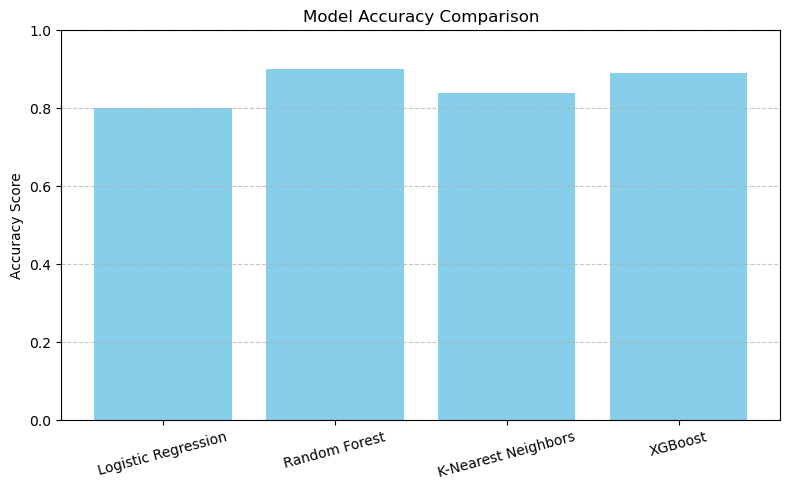

In [47]:
accuracy_scores = {
    'Logistic Regression': 0.80,
    'Random Forest': 0.90,
    'K-Nearest Neighbors': 0.84,
    'XGBoost': 0.89
}

# Plot
plt.figure(figsize=(8,5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 📌 Conclusion

This project aimed to conduct an in-depth analysis of hotel booking data to uncover key patterns, behaviors, and business insights. Using a structured approach of data preprocessing, exploratory data analysis (EDA), and visualization techniques, we were able to draw meaningful conclusions that can inform hotel management decisions.

### Key Takeaways:

- **Seasonality and Booking Trends**:  
  The monthly booking volume revealed significant seasonality, with clear peaks in summer months. This highlights the need for dynamic pricing and staffing strategies to match fluctuating demand.

- **Cancellation Behavior**:  
  Approximately one-third of bookings were canceled, with noticeable variations across months and customer types. City hotels experienced a higher cancellation rate compared to resort hotels, which indicates a greater degree of uncertainty in urban stays—possibly due to business-related bookings.

- **Customer Segmentation Insights**:  
  Transient guests were the most frequent bookers but also showed the highest cancellation tendencies. In contrast, contract customers showed greater booking stability, suggesting they represent a more reliable revenue stream.

- **Lead Time Patterns**:  
  Most bookings were made well in advance, although a long lead time often correlated with a higher chance of cancellation. This insight supports the adoption of stricter policies or prepayment requirements for early bookings to minimize revenue leakage.

- **Revenue Analysis**:  
  The Average Daily Rate (ADR) was found to be generally higher for canceled bookings, indicating a potential link between higher prices and booking volatility. Special offers or flexible policies for high-ADR guests may help secure these bookings more reliably.

- **Geographic Distribution**:  
  The majority of bookings originated from a small group of countries, suggesting targeted international marketing and culturally tailored experiences could enhance customer satisfaction and loyalty.

### Business Implications:

- Hotels can **optimize resource allocation**, staffing, and marketing efforts by anticipating seasonal booking trends.
- Identifying high-risk segments and implementing **flexible yet revenue-protective policies** can reduce cancellations.
- Leveraging insights on lead time and customer type can help design **personalized offers and loyalty programs** to retain customers and enhance profitability.
- Monitoring the ADR-cancellation dynamic enables the development of **strategic pricing models** that balance competitiveness with booking reliability.

### Final Note:

This analysis provides a foundational understanding of hotel booking dynamics. Future work could include predictive modeling for cancellations, deeper segmentation using machine learning, or real-time dashboards for operational decision-making. Overall, data-driven approaches like this are essential for modern hospitality management in a competitive and dynamic market.
